## **Python and Big Data Analytics Course Project**

## *Agricultural Production Analysis*

<img src="https://cdn.pixabay.com/photo/2014/12/11/02/55/cereals-563796__340.jpg" width=1200  height=450/>

Kristine Dege & Grazina Statkevičiūtė



##### **The Dataset used in the Course Project is downloaded from the website https://data.world/agriculture/ and include crop statistics for 173 products in European countries**.
##### Data covering the following categories: Crops Primary, Fibre Crops Primary, Cereals, Coarse Grain, Citrus Fruit, Fruit, Jute & Jute-like Fibres, Oilcakes Equivalent, Oil crops Primary, Pulses, Roots and Tubers, Treenuts and Vegetables, and Melons. Data are expressed in terms of area harvested, production quantity, yield and seed quantity. 
##### Data source: The Food and Agriculture Organization of the United Nations (FAO).

##### The objective of the Project is to explore, clean and analyse data for crop production in European countries.


In [ ]:
# *The full path used to get the dataset download link:*
# * browser = webdriver.Edge('C:/Users/Kristine/Drivers/msedgedriver.exe')
# * time.sleep(2)
# * url = 'https://data.world/agriculture/'
# * browser.get(url)
# * dataset_button = browser.find_element(By.XPATH, '//*[@id="profile_view.main_tabs-pane-overview"]/div/div/div[1]/div/ul/li[2]/div').click() *# Click on Datasets button.*
# * crop_pr_but = browser.find_element(By.XPATH, '//*[@id="profile_view.main_tabs-pane-resources"]/div/div/div[2]/div[2]/div/div/div[9]/div/div[2]/div[1]/a').click() *# Click Crop_Production datasets button.  Overview and discription of datasets are available.*
# * crop_ds = browser.find_element(By.XPATH, '//*[@id="dataset_view.main_tabs-pane-details"]/div/div/div[1]/div[4]/div[8]/div/div/div[1]/div/div[1]/a[2]/span').click() *# In case you are not a registered user then sign-up model will be opened. There is an option to proceed with Google/ Facebook/ GitHub/ Twitter account.*

# * browser.find_element(By.XPATH, '//*[@id="create_user.email"]').send_keys(email)  
# * browser.find_element(By.XPATH, '//*[@id="create_user.displayName"]').send_keys(Name)
# * browser.find_element(By.XPATH, '//*[@id="create_user.agentid"]').send_keys(Username)
# * browser.find_element(By.XPATH, '//*[@id="create_user.password1"]').send_keys(Password)
# * browser.find_element(By.XPATH, '/html/body/div[13]/div[2]/div/div/div/div/div[2]/div/div/div/form/button').click() *# Click on Continue button.*
# * browser.find_element(By.XPATH, '/html/body/div[2]/div[2]/div/div/div/div/div[2]/a').click() *# Click on button Create a Project.*
# * browser.find_element(By.XPATH, '//*[@id="root"]/div/div[2]/div[2]/div/div[1]/div[2]/div/div/div[4]/div/div/div/div/div[2]/div[1]/a').click() *# Now you should verify your e-mail address and then click on Crop Production dataset.*
# * browser.find_element(By.XPATH, '//*[@id="dataset_view.main_tabs-pane-details"]/div/div/div[1]/div[4]/div[8]/div/div/div[1]/div/div[1]/a[2]').click() *# Click on dataset Crop Production in Eastern Europe.*
# * browser.find_element(By.XPATH, '//*[@id="file_renderer.modal_common.export_dropdown"]/div/span[2]').click() *# Click on Download drop-down menu.*
# * browser.find_element(By.XPATH, '/html/body/div[2]/div/ul/span[1]/li/a/div[2]/div[1]').click() *# Click on Share URL. Now you can copy the path to download csv file from web-site.*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from folium.plugins import MarkerCluster
import folium
from geopy.geocoders import Nominatim
import pycountry_convert as pc
import numpy as np

In [2]:
df = pd.read_csv('https://query.data.world/s/zmbllbphuegmiqcjpgtnrl3xew2jxh')

In [3]:
df.sample(3)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F
2163,51,Czechoslovakia,358,Cabbages and other brassicas,5510,Production,tonnes,318900.0,NaN,281600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7243,146,Republic of Moldova,15,Wheat,5510,Production,tonnes,NaN,NaN,NaN,...,922283.0,NaN,1292921.0,NaN,1250702.0,NaN,1162778.0,NaN,1147482.0,NaN
9687,230,Ukraine,397,Cucumbers and gherkins,5419,Yield,hg/ha,NaN,NaN,NaN,...,189460.0,Fc,190542.0,Fc,177833.0,Fc,199014.0,Fc,198497.0,Fc


In [4]:
df.shape

(10557, 125)

In [7]:
# Deleting all forecast columns as they are empty

for col in df.columns:
    if 'F' in col:
        del df[col]
   
df.head(3)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,3,Albania,515,Apples,5312,Area harvested,ha,NaN,NaN,NaN,...,3913.0,3450.0,3719.0,3838.0,3863.0,4008.0,4230.0,4346.0,4294.0,4407.0
1,3,Albania,515,Apples,5419,Yield,hg/ha,NaN,NaN,NaN,...,139545.0,185507.0,191718.0,197316.0,212426.0,228882.0,240028.0,221671.0,252387.0,240374.0
2,3,Albania,515,Apples,5510,Production,tonnes,10004.0,8039.0,7931.0,...,54604.0,64000.0,71300.0,75730.0,82060.0,91736.0,101532.0,96338.0,108375.0,105933.0


In [8]:
#Changing years column name from'Y2010' to numeric only

df.columns = map(lambda x : x.replace("Y", ""), df.columns)

In [9]:
#Dropping 4 columns as they won't be used in analysis

df.drop(['Area Code', 'Item Code', 'Element', 'Element Code'], axis=1, inplace=True)

In [10]:
#Reshaping dataset for analysis and plotting

df_melted = (df.melt(id_vars=['Area', 'Item', 'Unit'],var_name='Year')
                    .set_index(['Area', 'Item', 'Year', 'Unit'])
                    .squeeze()
                    .unstack()
                    .reset_index())

In [11]:
df_melted.columns

Index(['Area', 'Item', 'Year', 'ha', 'hg/ha', 'tonnes'], dtype='object', name='Unit')

In [13]:
# Renaming columns

df_melted.columns = ['Country', 'Item', 'Year', 'Area_ha', 'Yield_hg_ha', 'Production_t']

In [14]:
df_melted.reset_index().head(3)

,index,Country,Item,Year,Area_ha,Yield_hg_ha,Production_t
0,0,Albania,Apples,1961,NaN,NaN,10004.0
1,1,Albania,Apples,1962,NaN,NaN,8039.0
2,2,Albania,Apples,1963,NaN,NaN,7931.0


In [15]:
df_melted.shape

(222312, 6)

In [16]:
# Dropping rows where NaN values are in all three columns

df_melted.dropna(subset = ['Area_ha', 'Yield_hg_ha', 'Production_t'], how='all', inplace=True)

In [17]:
# As some product items (for example apples, mushrooms) do not have values in columns Area_ha and Yield hg/ha
# but only production in tonnes then it's reasonable to change these NaN values to 0

df_melted.replace(np.nan, "0", inplace = True)

In [18]:
df_melted.info()    #All columns have same dtype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118660 entries, 0 to 222283
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Country       118660 non-null  object
 1   Item          118660 non-null  object
 2   Year          118660 non-null  object
 3   Area_ha       118660 non-null  object
 4   Yield_hg_ha   118660 non-null  object
 5   Production_t  118660 non-null  object
dtypes: object(6)
memory usage: 6.3+ MB


In [19]:
convert_dict = {
                'Area_ha': int,
                'Yield_hg_ha': int,
                'Production_t': int
                }
 
df_melted = df_melted.astype(convert_dict) #Converting dtype to appropriate

In [20]:
df_melted['Year'] = pd.to_datetime(df_melted['Year']).dt.year

In [21]:
# Adding new column to see yield production t/ha

df_melted['Yield_t_ha'] = round(df_melted.apply(lambda row: (row.Yield_hg_ha / 10_000), axis = 1), 2)

In [22]:
df_melted.describe().apply(lambda s: s.apply('{:,.2f}'.format)) # Formatting describe function to more readable

,Year,Area_ha,Yield_hg_ha,Production_t,Yield_t_ha
count,"118,660.00","118,660.00","118,660.00","118,660.00","118,660.00"
mean,"1,993.72","240,676.11","165,737.91","1,012,989.45",16.57
std,16.96,"2,423,433.90","1,972,491.98","5,417,701.25",197.25
min,"1,961.00",0.00,0.00,0.00,0.00
25%,"1,980.00",439.00,"12,854.00","3,153.75",1.29
50%,"1,996.00","4,400.00","37,976.50","26,377.50",3.80
75%,"2,008.00","35,132.25","132,545.00","234,678.50",13.25
max,"2,019.00","125,150,000.00","244,995,000.00","213,687,000.00","24,499.50"


In [23]:
df_melted.shape     # By dropping NaN values total number of rows reduced from 222_312 to 118_660

(118660, 7)

In [24]:
df_melted.sample(5)

,Country,Item,Year,Area_ha,Yield_hg_ha,Production_t,Yield_t_ha
159364,Romania,Potatoes,1966,317300,105638,3351900,10.56
219779,Yugoslav SFR,Millet,1965,8470,7544,6390,0.75
179224,Slovakia,Plums and sloes,2002,2650,32570,8631,3.26
150072,Portugal,Triticale,1996,42320,13178,55768,1.32
148108,Portugal,"Onions, dry",1979,2500,282512,70628,28.25


In [25]:
df_melted['Item'].nunique()     #Dataset still contains all 137 product items

137

In [26]:
df_melted['Item'].unique()

array(['Apples', 'Apricots', 'Barley', 'Beans, dry', 'Beans, green',
       'Broad beans, horse beans, dry', 'Cabbages and other brassicas',
       'Carrots and turnips', 'Cauliflowers and broccoli',
       'Cereals, Total', 'Cherries', 'Cherries, sour', 'Chestnut',
       'Chillies and peppers, green', 'Citrus Fruit, Total',
       'Cucumbers and gherkins', 'Dates', 'Eggplants (aubergines)',
       'Fibre Crops Primary', 'Figs', 'Fruit Primary',
       'Fruit, citrus nes', 'Fruit, fresh nes', 'Garlic', 'Grapes',
       'Hops', 'Leeks, other alliaceous vegetables', 'Lemons and limes',
       'Lettuce and chicory', 'Maize', 'Melons, other (inc.cantaloupes)',
       'Mushrooms and truffles', 'Nuts nes', 'Oats', 'Oilcrops',
       'Oilcrops, Cake Equivalent', 'Oilcrops, Oil Equivalent', 'Okra',
       'Olives', 'Onions, dry', 'Onions, shallots, green', 'Oranges',
       'Peaches and nectarines', 'Pears', 'Peas, green',
       'Plums and sloes', 'Potatoes', 'Pulses nes', 'Pulses, Total',
 

In [27]:
df_melted['Item'].value_counts()

Roots and Tubers, Total         1934
Potatoes                        1934
Vegetables Primary              1875
Tomatoes                        1875
Cabbages and other brassicas    1846
                                ... 
Tung nuts                         31
Okra                              30
Coffee, green                     28
Coconuts                          27
Agave fibres nes                   1
Name: Item, Length: 137, dtype: int64

##### The most cultivated agriculture products are: roots, potatoes, tomatoes, primary vegetables and cabbages.
##### The less cultivated products in Europe are: tung nuts, green coffee, coconuts, agave fibres.

In [28]:
# Creating new dataframe for map plotting

df_map = pd.DataFrame(df_melted.groupby(['Year', 'Country'], sort=True)['Production_t', 'Area_ha'].sum()).reset_index()

C:\Users\Д\AppData\Local\Temp\ipykernel_31244\3853495159.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_map = pd.DataFrame(df_melted.groupby(['Year', 'Country'], sort=True)['Production_t', 'Area_ha'].sum()).reset_index()


In [29]:
df_map.shape

(1934, 4)

In [30]:
df_melted['Country'].nunique()

45

In [31]:
df_map['Country'].nunique()

45

In [32]:
# Converting country name (column 'Country') into continent name

def convert(row):
    try:
        cn_code = pc.country_name_to_country_alpha2(row.Country, cn_name_format='default')
        conti_code = pc.country_alpha2_to_continent_code(cn_code)
        return conti_code
    except:
        None
  

In [33]:
# Creating nem column 'Continent'

df_map['Continent'] = df_map.apply(convert, axis = 1)
df_map.sample(3)

,Year,Country,Production_t,Area_ha,Continent
1744,2015,Faroe Islands,2782,194,EU
979,1995,Russian Federation,287627837,135524548,EU
743,1988,Italy,146679534,21183129,EU


In [34]:
df_none = df_map[df_map['Continent'].isnull()] ## checking None values

In [35]:
df_none['Country'].unique() 

array(['Belgium-Luxembourg', 'Czechoslovakia', 'USSR', 'Yugoslav SFR',
       'Serbia and Montenegro'], dtype=object)

In [36]:
#There are five countries that have changed their names and external borders. It is reasonable to drop them.

val = ['Belgium-Luxembourg', 'Czechoslovakia', 'USSR', 'Yugoslav SFR', 'Serbia and Montenegro']

In [37]:
df_map = df_map[df_map.Country.isin(val) == False] #Dropping unexisting countries

In [38]:
df_map.shape    # 147 rows are dropped

(1787, 5)

In [39]:
df_melted = df_melted[df_melted.Country.isin(val) == False] #Dropping unexisting countries in main table as well

In [40]:
# Converting country name into short name

def country(row):
    try:
        countr_code =  pc.country_name_to_country_alpha2(row.Country, cn_name_format='default')
        return countr_code
    except:
        return None

In [41]:
#Creating new column with countries' abrreviation

df_map['Country_Abrr'] = df_map.apply(country, axis = 1)
df_map.sample(3)

,Year,Country,Production_t,Area_ha,Continent,Country_Abrr
696,1986,Spain,118621866,34403883,EU,ES
1318,2004,Malta,261430,23318,EU,MT
1017,1996,Russian Federation,285237600,128729102,EU,RU


In [42]:
df_melted['Country_Abrr'] = df_melted.apply(country, axis = 1)

In [44]:
#Creating latitude and longitude values

geolocator = Nominatim(user_agent='berzina_e@yahoo.com')
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country.Country)
        # And return latitude and longitude
        return loc.latitude, loc.longitude
    except:
        # Return missing value 
        return None

In [69]:
#Creating new column Geolocatin with latitude and longitude values

df_map['GeoLocation'] = df_map.apply(geolocate, axis = 1)

In [71]:
df_map[df_map['GeoLocation'].isnull()]

,Year,Country,Production_t,Area_ha,Continent,Country_Abrr,GeoLocation


In [ ]:
#df_map.loc[df_map.Country == 'North Macedonia', ['GeoLocation', 'Latitude', 'Longitude']] = '(41.6137,  21.7433)', 41.6137,  21.7433 

In [47]:
#Creating two new columns

df_map[['Latitude', 'Longitude']] = df_map['GeoLocation'].astype(str)\
                .str.strip('()')\
                .str.split(', ', expand=True)\
                .rename(columns={0:'Latitude', 1:'Longitude'}) 

In [48]:
df_map.sample(3)

,Year,Country,Production_t,Area_ha,Continent,Country_Abrr,GeoLocation,Latitude,Longitude
1468,2008-01-01,Greece,37641798,7248171,EU,GR,"(38.9953683, 21.9877132)",38.9953683,21.9877132
1816,2017-01-01,Belarus,45598554,7374072,EU,BY,"(53.4250605, 27.6971358)",53.4250605,27.6971358
1655,2013-01-01,Austria,20982825,2461697,EU,AT,"(47.59397, 14.12456)",47.59397,14.12456


In [56]:
my_map = folium.Map(
    location=[42.9868853, 19.5180992],
    zoom_start=4
    )

for _, country in df_map.iterrows():
    folium.CircleMarker(
        location=[country['Latitude'], country['Longitude']],
        radius=5,
        fill_color='red'
    ).add_to(my_map)

my_map

In [49]:
conv_dict = {
                'Latitude': float,
                'Longitude': float
                }
 
df_map = df_map.astype(conv_dict)

In [50]:
df_map['Year'] = df_map['Year'].dt.strftime('%Y')

In [48]:
map_agr_area = folium.Map([42 ,29], zoom_start=5)

marker_cluster = MarkerCluster(
    name="clustered name",
).add_to(map_agr_area)

for row in df_map.itertuples():
    #print(row)
    folium.Marker(location=[row.Latitude,row.Longitude],popup=[row.Area_ha, row.Year]).add_to(marker_cluster)

folium.LayerControl().add_to(map_agr_area)

map_agr_area

In [84]:
# Renaming some countries 
df_melted.replace({'Country': {'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom', 
                            'Russian Federation': 'Russia', 
                            'Republic of Moldova': 'Moldova'
                            }
                            }, inplace= True)

In [85]:
df_melted.to_csv('df_melted') #Making a copy of cleaned data to csv file

#### Comparing the trend of production in tonnes of top 5 countries

In [75]:
# Creating a new data frame to sum production by year and country
df_prod = df_melted.groupby(['Country', 'Year'])['Production_t'].aggregate('sum').reset_index()

In [76]:
# Reshaping the data frame for creating a new column 'Total production in tonnes'
df_prod_pv = pd.pivot(df_prod, index='Country', columns='Year', values='Production_t').reset_index()

In [77]:
df_prod_pv['Total'] = df_prod_pv.sum(axis=1)

C:\Users\Д\AppData\Local\Temp\ipykernel_31244\2908974201.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_prod_pv['Total'] = df_prod_pv.sum(axis=1)


In [78]:
# Sorting values to find out the top five crop producers
df_prod_tfive = df_prod_pv.sort_values(by='Total', ascending=False).head(5)

In [79]:
# Dropping the column 'Total' as it won't be used in plot
df_prod_tfive.drop(['Total'], axis=1, inplace=True)

In [81]:
#Reshaping the data frame for plotting
df_unpivot = df_prod_tfive.melt(id_vars='Country', var_name='Year', value_name='Production_t')

In [82]:
df_unpivot.head(2)

,Country,Year,Production_t
0,France,1961,136033512.0
1,Germany,1961,137213361.0


Text(0.5, 1.0, 'Top 5 countries in Crop production')

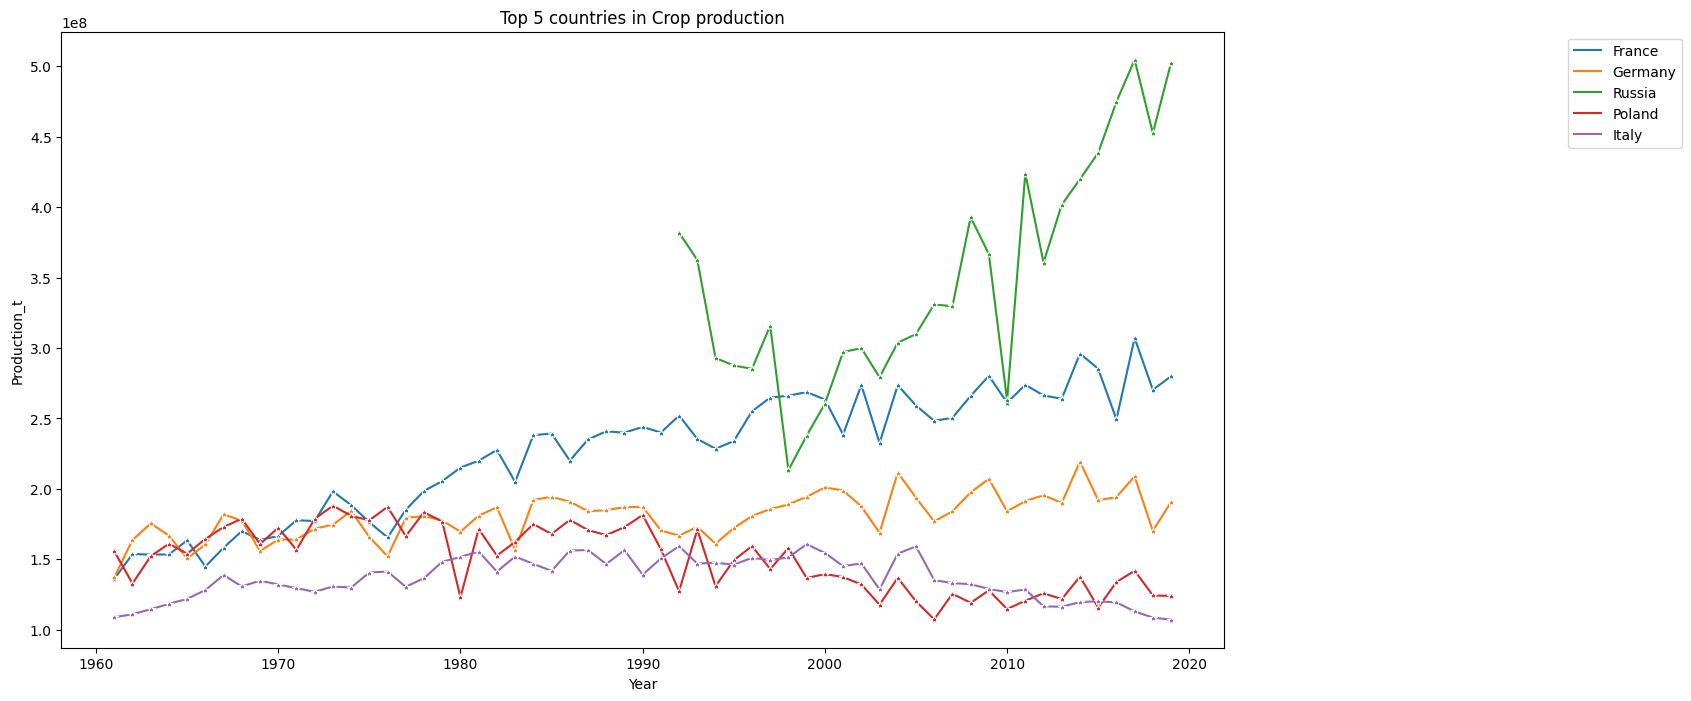

In [83]:

# Changing seaborn plot size
plot = sns.lineplot(data = df_unpivot, x= 'Year', y= 'Production_t', hue= 'Country', marker= '*')
plot.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.gcf().set_size_inches(15, 8)
plt.title('Top 5 countries in Crop production')
# plt.xlabel('Years')
# plt.ylabel('tonnes')

